In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [92]:
def draw_contour_outline(img, counts, color, thickness=1):

    """ Draw contours outlines of each contour """

    for count in counts:
        cv2.drawContours(img, [count],0, color, thickness)

In [93]:
def build_sample_image():

    """ Builds a sample image with basic shapes """

    #Creating a 500x500 gray image (70 pixel value) with a rechtange and circle shape

    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100),(300, 300),(255, 0, 255), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)

    return img

In [94]:
def build_sample_image_2():
    """Builds a sample image with basic shapes """

    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100),(300, 300), (255, 0, 255), -1)
    cv2.rectangle(img, (150, 150), (250, 250), (70, 70, 70), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    cv2.circle(img, (400, 400), 50, (70, 70,70), -1)

    return img 

In [95]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(1, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

fig = plt.figure(figsize=(12, 5))
plt.suptitle("Contours Detection", fontsize=14)
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 864x360 with 0 Axes>

In [96]:
image = build_sample_image_2()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [97]:
#Thresholding to get BINARY image
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

Finding Contours using the thresholded image, ``cv2.findContours()`` return only the contours and the hierarchy

Syntax:

``cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image,
contours, hierarchy``

``modes``

- ``cv2.RETR_EXTERNAL`` - outputs only external the contours
- ``cv2.RETR_LIST`` - outputs all the contours without any hierarchical relationship
- ``cv2.RETR_TREE`` - outputs all the contours by establishing a hierarchical relationship. 


``hierarchy`` 

contains information about this hierarchical relationship, providing
an entry for each detected contour. 

For each $i^{th}$ contour ``contours[i]``,

``hierarchy[i][j]`` with j in the range [0,3] contains the following:

``hierarchy[i][0]``: Index of the next contour at the same hierarchical level

``hierarchy[i][1]``: Index of the previous contour at the same hierarchical
level

``hierarchy[i][2]``: Index of the first child contour

``hierarchy[i][3]``: Index of the parent contour

In [98]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [99]:
print("Detected Contours (RETR_EXTERNAL):'{}' ".format(len(contours)) )
print("detected contours (RETR_LIST): '{}' ".format(len(contours2)))

Detected Contours (RETR_EXTERNAL):'2' 
detected contours (RETR_LIST): '4' 


In [100]:
draw_contour_outline(image, contours, (0, 0, 255), 5)
draw_contour_outline(image, contours2, (255, 0, 0), 5)

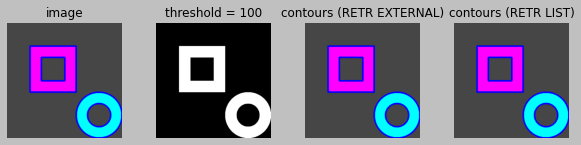

In [101]:
# Plot the images:
img_plt(image, "image", 1)
img_plt(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "threshold = 100", 2)
img_plt(image, "contours (RETR EXTERNAL)", 3)
img_plt(image, "contours (RETR LIST)", 4)


plt.subplots_adjust(top=3,bottom=1.5, right=1.5, left=0.2, wspace=0.3, hspace=0.3)
plt.show()
